In [37]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

cancer = datasets.load_breast_cancer()
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])
pipeline.fit(x_train, y_train)
y_hat = pipeline.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

print(confusion_matrix(y_test, y_hat))
print(precision_score(y_test, y_hat))
print(recall_score(y_test, y_hat))

[[53  1]
 [ 2 87]]
0.9886363636363636
0.9775280898876404


In [40]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test, y_hat, target_names=cancer.target_names
))

              precision    recall  f1-score   support

   malignant       0.96      0.98      0.97        54
      benign       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [41]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_hat))

0.9830508474576272


In [42]:

decision_scores = pipeline.decision_function(x_test)
print(decision_scores.shape)
print(decision_scores[:10])
print(np.min(decision_scores))
print(np.max(decision_scores))

(143,)
[  1.96127089 -11.38074677  -5.8688768    7.51437272   9.53889523
 -22.63573219 -19.80154138  -3.23176196   0.33358757   7.30468799]
-27.180532423129907
14.08189126205985


In [43]:
import numpy as np

y_hat_2 = np.array(decision_scores >= 5, dtype='int')
print(confusion_matrix(y_test, y_hat_2))
print(precision_score(y_test, y_hat_2))
print(recall_score(y_test, y_hat_2))

[[54  0]
 [34 55]]
1.0
0.6179775280898876


In [44]:
y_hat_3 = np.array(decision_scores >= -5, dtype='int')
print(confusion_matrix(y_test, y_hat_3))
print(precision_score(y_test, y_hat_3))
print(recall_score(y_test, y_hat_3))

[[46  8]
 [ 0 89]]
0.9175257731958762
1.0


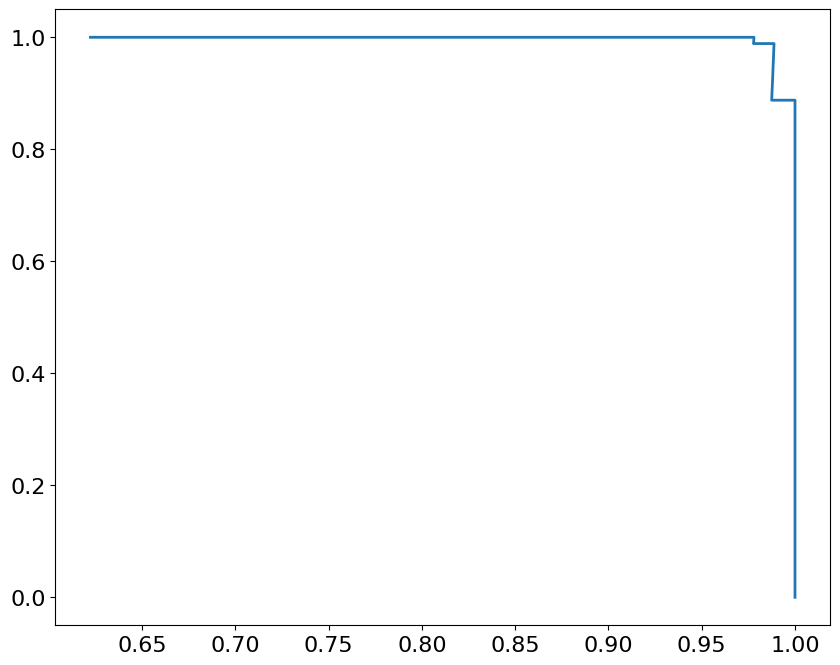

In [45]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)
plt.figure(figsize=(10, 8))
plt.plot(precisions, recalls, linewidth=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

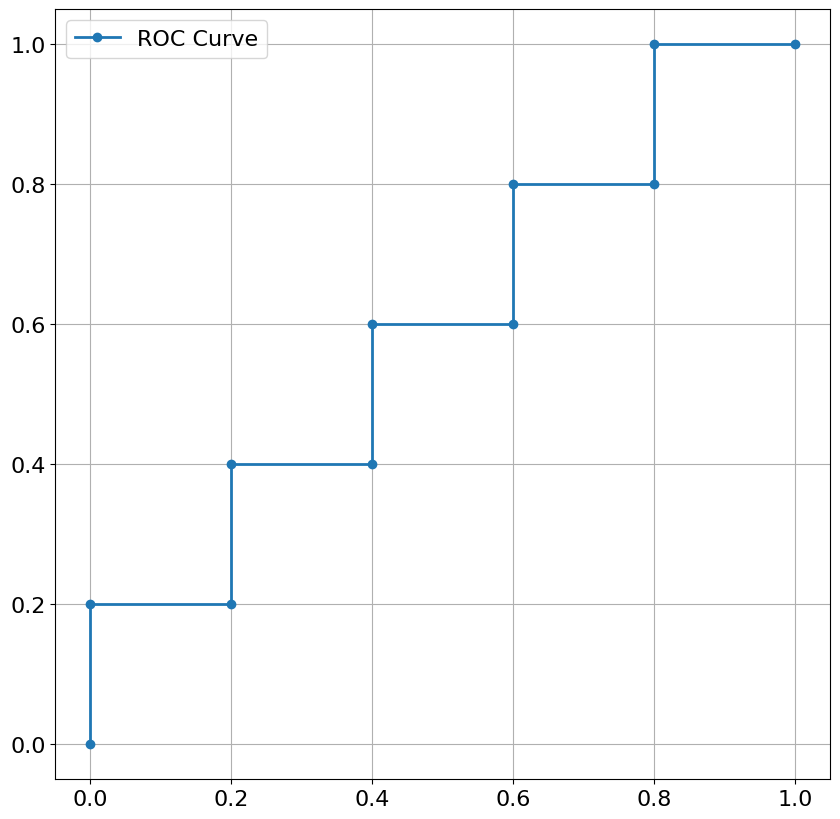

In [46]:
from sklearn.metrics import roc_curve

# 真实标签
y_true = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

# 预测概率
y_scores = [0.9, 0.8, 0.75, 0.7, 0.6, 0.55, 0.4, 0.3, 0.2, 0.1]

fpr, tpr, _ = roc_curve(y_true, y_scores)
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, marker='o', label='ROC Curve', linewidth=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

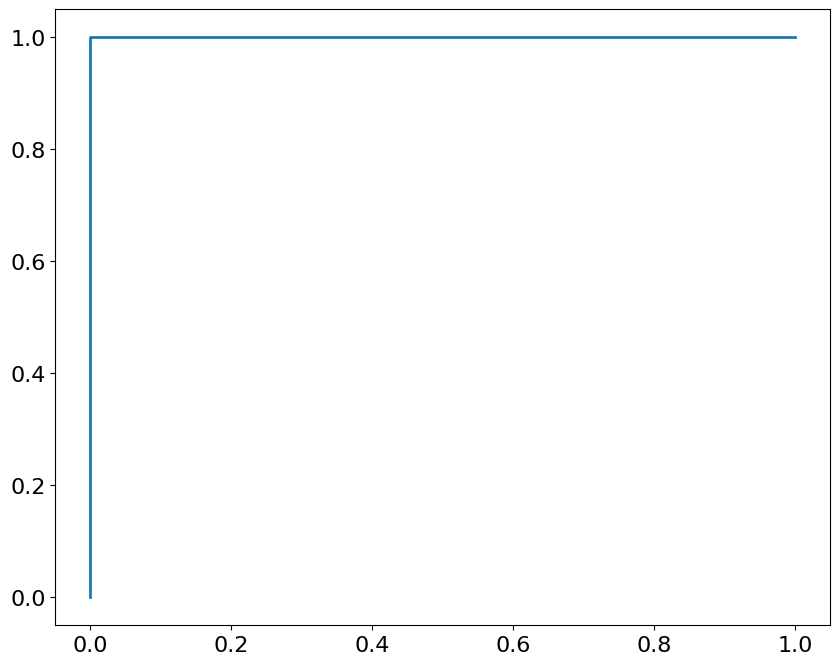

In [47]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_hat, decision_scores)
plt.figure(figsize=(10, 8))
plt.plot(fprs, tprs, linewidth=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [48]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=95)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)
y_predict = log_reg.predict(X_test)
print(precision_score(y_test, y_predict, average='micro'))

0.9736842105263158


In [49]:
print(confusion_matrix(y_test, y_predict))

[[10  0  0]
 [ 0 12  1]
 [ 0  0 15]]


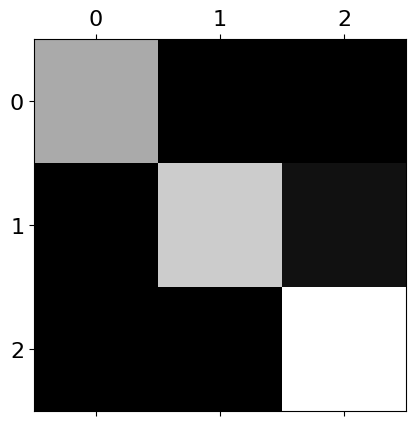

In [50]:
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

[[0.         0.         0.        ]
 [0.         0.         0.06666667]
 [0.         0.         0.        ]]


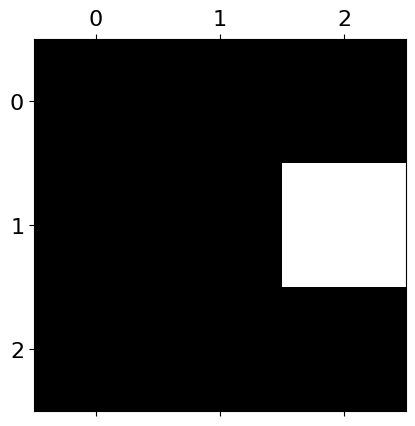

In [51]:
row_sums = np.sum(cfm, axis=1)
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0)
print(err_matrix)
plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [52]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=5000, n_features=2, n_classes=3,
                           n_informative=2, n_redundant=0,
                           n_repeated=0,  n_clusters_per_class=1, 
                           weights=[0.01, 0.05, 0.94], random_state=0)

In [53]:
from collections import Counter

Counter(y)

Counter({2: 4674, 1: 262, 0: 64})

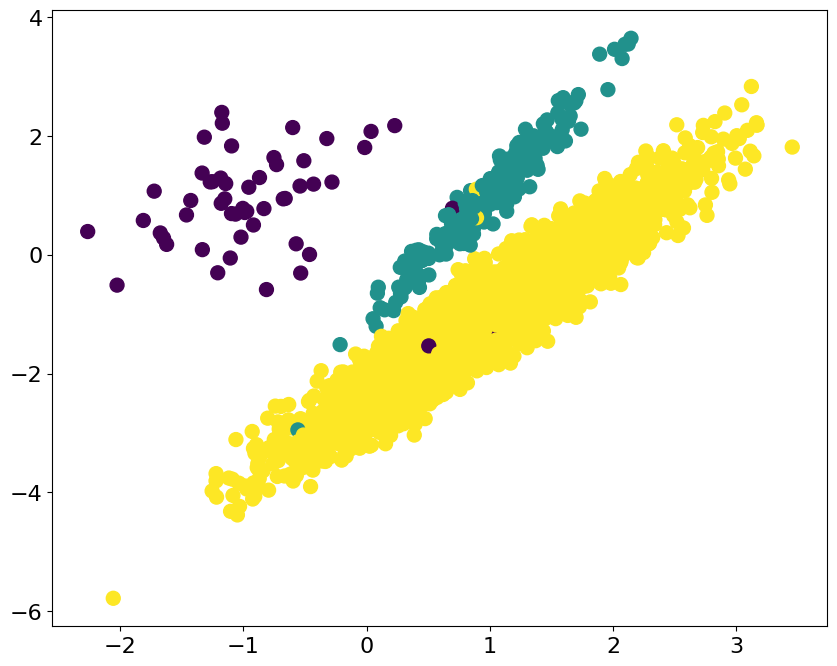

In [54]:
def plot_distribution(X, y):
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='viridis')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()
    
plot_distribution(X, y)

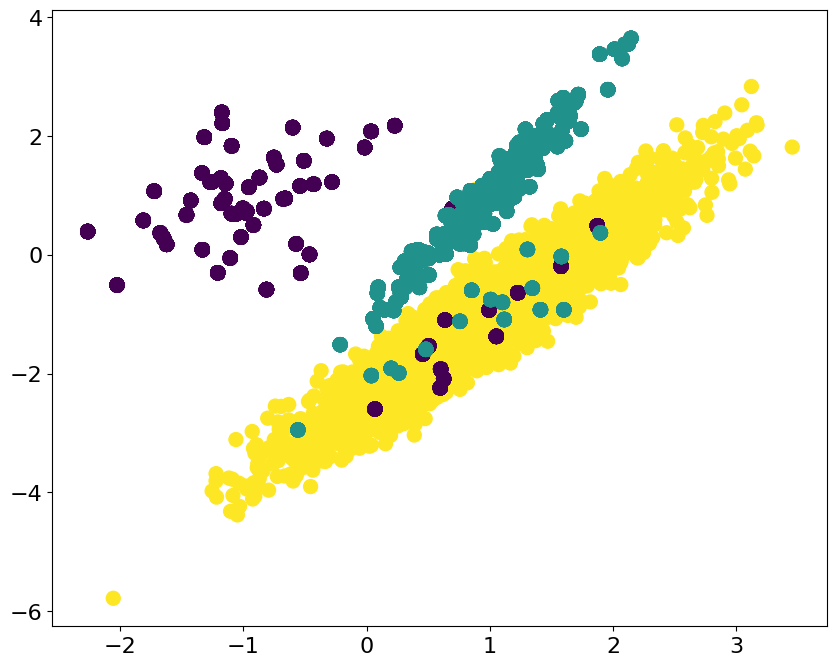

In [55]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
Counter(y_resampled)
plot_distribution(X_resampled, y_resampled)

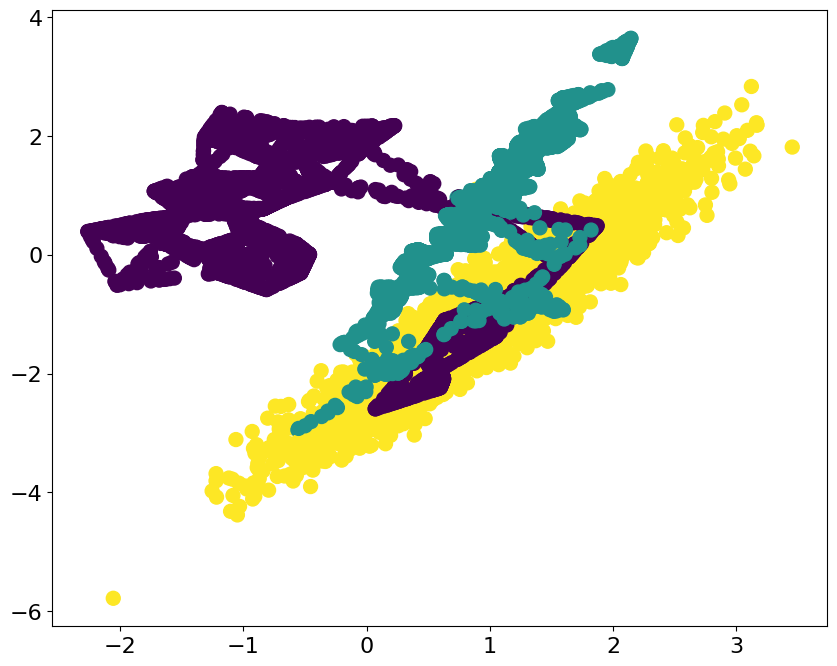

In [56]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X, y)
Counter(y_resampled)
plot_distribution(X_resampled, y_resampled)

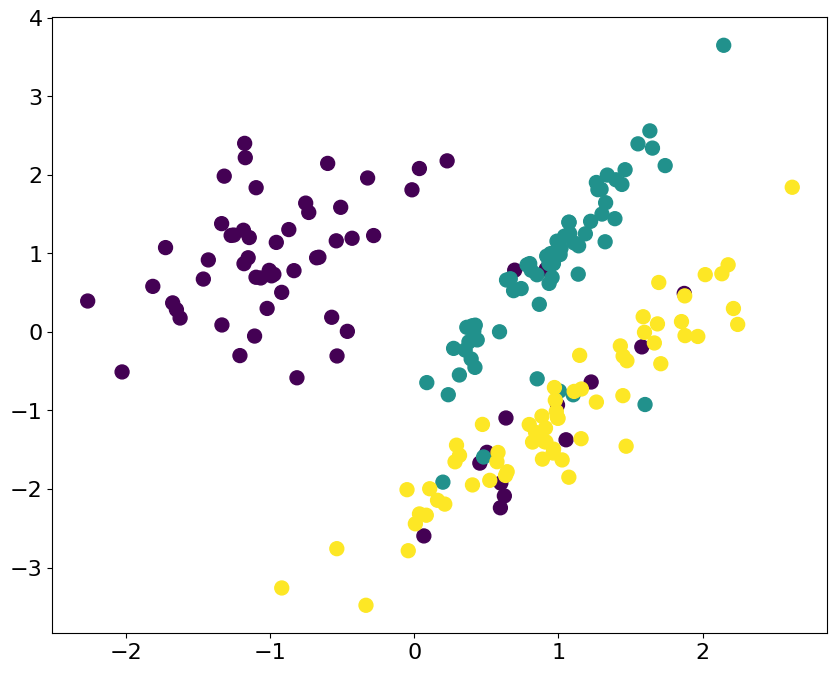

In [57]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
Counter(y_resampled)
plot_distribution(X_resampled, y_resampled)